In [342]:
import pandas as pd
import numpy as np
import string
import re
from collections import Counter

# Import Data

In [326]:
news_df = pd.read_csv('../data_intermed/news_bert.csv')
news_df = news_df[news_df['text']!=" "]

In [330]:
news_df['puretext'] = news_df['cleantext'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)).lower())
news_df['puretitle'] = news_df['title'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)).lower())

In [331]:
puretext = news_df.puretext.values

In [332]:
news_df.head(2)

,Unnamed: 0,title,text,subject,date,label,cleantitle,cleantext,source,puretext_wpunc,puretitle_wpunc,puretext,puretitle
0,0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",true,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction ...,WASHINGTON (Reuters),the head of a conservative republican faction ...,"as u.s. budget fight looms, republicans flip t...",the head of a conservative republican faction ...,as us budget fight looms republicans flip thei...
1,1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",true,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fir...,WASHINGTON (Reuters),transgender people will be allowed for the fir...,u.s. military to accept transgender recruits o...,transgender people will be allowed for the fir...,us military to accept transgender recruits on ...


In [333]:
news_df[news_df['label']=='fake']['text'][41008]

'Here s Pence getting booed as he gets to his seats at Hamilton pic.twitter.com/IRQG68x1sB  David K (@dkipke12) November 19, 2016Yes #MikePence was at @HamiltonMusical here s what we had to say pic.twitter.com/YIjt7JZ3gF  G R E G O R Y (@ghaney22) November 19, 2016'

In [334]:
news_df[news_df['label']=='fake']['text'][33001]

'You re gonna love this!The left has been screaming for decades about the government interfering in their right to kill their babies. Because after all, even though it s a human life in its earliest stages of development; it s growing inside their womb, so the government has no business protecting the innocent life of that baby in THEIR bodies.Strangely enough, the left is angry about Trump s decision to let the states decide if they will or will not force its citizens to share a bathroom or public shower with a person who claims to be a certain gender contrary to what their genitals say they are. Clearly the hypocritical left can t make up their mind when it s okay, or when it s not okay for the government to tell citizens what they can or cannot do '

In [335]:
news_df[news_df['label']=='true']['text'][1]

'WASHINGTON (Reuters) - Transgender people will be allowed for the first time to enlist in the U.S. military starting on Monday as ordered by federal courts, the Pentagon said on Friday, after President Donald Trump’s administration decided not to appeal rulings that blocked his transgender ban. Two federal appeals courts, one in Washington and one in Virginia, last week rejected the administration’s request to put on hold orders by lower court judges requiring the military to begin accepting transgender recruits on Jan. 1. A Justice Department official said the administration will not challenge those rulings. “The Department of Defense has announced that it will be releasing an independent study of these issues in the coming weeks. So rather than litigate this interim appeal before that occurs, the administration has decided to wait for DOD’s study and will continue to defend the president’s lawful authority in District Court in the meantime,” the official said, speaking on condition 

In [336]:
def searchSource(text, term):
    return term in text

In [337]:
news_df['21stCenturyWire'] = news_df['puretext'].apply(lambda x: searchSource(x, '21st century wire'))
news_df['video_title'] = news_df['puretitle'].apply(lambda x: searchSource(x, 'video'))
news_df['(VIDEO)_title'] = news_df['title'].apply(lambda x: searchSource(x, '(VIDEO)'))
news_df['[VIDEO]_title'] = news_df['title'].apply(lambda x: searchSource(x, '[VIDEO]'))
news_df['VIDEO_title'] = news_df['title'].apply(lambda x: searchSource(x, 'VIDEO'))
news_df['Video_title'] = news_df['title'].apply(lambda x: searchSource(x, 'Video'))
news_df['Videos_title'] = news_df['title'].apply(lambda x: searchSource(x, 'Videos'))
news_df['images_title'] = news_df['puretitle'].apply(lambda x: searchSource(x, 'images'))
news_df['IMAGES_title'] = news_df['title'].apply(lambda x: searchSource(x, 'IMAGES'))
news_df['Reuters'] = news_df['text'].apply(lambda x: searchSource(x, 'Reuters'))

In [338]:
news_df.groupby('label').sum()

,Unnamed: 0,21stCenturyWire,video_title,(VIDEO)_title,[VIDEO]_title,VIDEO_title,Video_title,Videos_title,images_title,IMAGES_title,Reuters
label,,,,,,,,,,,
fake,756009231,1254.0,7855.0,2492.0,2372.0,5314.0,2645.0,28.0,164.0,156.0,311.0
true,229324266,0.0,40.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,21378.0


In [341]:
re.sub('\(Video\)|(\(|\[)(.)*VIDEO(S)?(.)*(\)|\])','','VIDEO: XX')

'VIDEO: XX'

In [116]:
# # remove punctuation and tokenize
# import nltk
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')

In [117]:
# # clean to tokenize text and title
# tokenizer_nltk = nltk.RegexpTokenizer(r"\w+")
# news_df['texttoken'] = news_df['puretext'].apply(lambda x: tokenizer_nltk.tokenize(x))
# news_df['titletoken'] = news_df['title'].apply(lambda x: tokenizer_nltk.tokenize(x))

# Count Number of Words

In [343]:
def numUniqueWords(text):
    return len(Counter(text.split()))

def numWords(text):
    return len(text.split())

In [344]:
numUniqueWords(puretext[0]), numWords(puretext[0])

(381, 743)

In [345]:
news_df['numUniqueWords'] = news_df['puretext'].apply(lambda x: numUniqueWords(x))
news_df['numWords'] = news_df['puretext'].apply(lambda x: numWords(x))+1
news_df['percUniqueWords'] = news_df['numUniqueWords']/news_df['numWords']

In [346]:
word_counts = news_df.groupby('label').sum()
word_counts.rename(columns={'Unnamed: 0': 'total'})

,total,21stCenturyWire,video_title,(VIDEO)_title,[VIDEO]_title,VIDEO_title,Video_title,Videos_title,images_title,IMAGES_title,Reuters,numUniqueWords,numWords,percUniqueWords
label,,,,,,,,,,,,,,
fake,756009231,1254.0,7855.0,2492.0,2372.0,5314.0,2645.0,28.0,164.0,156.0,311.0,5100157,9903049,13187.041939
true,229324266,0.0,40.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,21378.0,4398683,8186269,12760.516454


In [456]:
def lexicographi_compare(s, t, s_original, t_original):
    s = s.lower()
    t = t.lower()
    
    if s[0]<t[0] or s[0]=='': return s_original
    if s[0]>t[0] or t[0]=='': return t_original

    else: return lexicographi_compare(s[1:], t[1:], s_original, t_original)

In [347]:
news_df.groupby('label').median()

,Unnamed: 0,21stCenturyWire,video_title,(VIDEO)_title,[VIDEO]_title,VIDEO_title,Video_title,Videos_title,images_title,IMAGES_title,Reuters,numUniqueWords,numWords,percUniqueWords
label,,,,,,,,,,,,,,
fake,32909.0,False,False,False,False,False,False,False,False,False,False,205.0,367.0,0.559028
true,10708.5,False,False,False,False,False,False,False,False,False,True,200.0,357.0,0.573676


In [356]:
news_df.groupby(['label','video_title']).median()

Unnamed: 0  21stCenturyWire  (VIDEO)_title  [VIDEO]_title  \
label video_title                                                              
fake  False           32324.0            False          False          False   
      True            33365.0            False          False          False   
true  False           10710.5            False          False          False   
      True             9791.0            False          False          False   

                   VIDEO_title  Video_title  Videos_title  images_title  \
label video_title                                                         
fake  False              False        False         False         False   
      True                True        False         False         False   
true  False              False        False         False         False   
      True               False        False         False         False   

                   IMAGES_title  Reuters  numUniqueWords  numWords  \
label video_title                                                    
fake  False               False    False           220.0     399.0   
      True                False    False           178.0     311.0   
true  False               False     True           200.0     357.0   
      True                False     True           230.0     411.0   

                   percUniqueWords  
label video_title                   
fake  False               0.550239  
      True                0.578788  
true  False               0.573770  
      True                0.547586

In [349]:
import matplotlib.pyplot as plt
# https://matplotlib.org/3.1.1/gallery/statistics/histogram_multihist.html

In [350]:
news_df.percUniqueWords.size

44271

In [357]:
# set for histograms
percUniqueWords = news_df.percUniqueWords.values
labels = news_df.label.values
y = np.zeros(labels.shape)
y[labels == 'fake'] = 1

percUniqueWordsList = []
percUniqueWordsTrue = percUniqueWords[labels=="true"]
percUniqueWordsFake = percUniqueWords[labels=="fake"]
percUniqueWordsList.append(percUniqueWordsTrue)
percUniqueWordsList.append(percUniqueWordsFake)

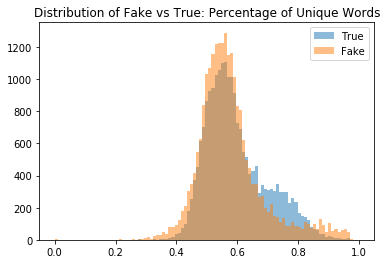

In [368]:
# plot histogram method 1
bins = np.linspace(0, 1, 100)

plt.hist(percUniqueWordsTrue, bins, alpha=0.5, label='True')
plt.hist(percUniqueWordsFake, bins, alpha=0.5, label='Fake')
plt.title('Distribution of Fake vs True: Percentage of Unique Words')
plt.legend(loc='upper right')
plt.show()

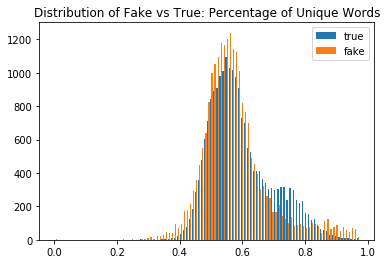

In [369]:
# plot histogram method 2
n_bins = 100

# stacked bar
plt.hist(percUniqueWordsList, n_bins, density=False, histtype='bar', label=['true','fake'])
plt.title('Distribution of Fake vs True: Percentage of Unique Words')
plt.legend()
plt.show()

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [370]:
def lrModelEval(X, y, test_perc):
    X_train, X_test, y_train, y_test = train_test_split(X.reshape(-1,1), y, test_size=test_perc, random_state=42)
    
    clf = LogisticRegression(random_state=0, max_iter = 1000).fit(X_train, y_train)
    
    # predict
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    assert(y_pred_train.shape == y_train.shape)
    assert(y_pred_test.shape == y_test.shape)
    
    # evaluate
    
    print('training accuracy:', clf.score(X_train, y_train))
    print('test accuracy:', clf.score(X_test, y_test))
    print('train f-score:', f1_score(y_train, y_pred_train))
    print('test f-score:', f1_score(y_test, y_pred_test))
    
    return clf

In [371]:
lrModelEval(percUniqueWords, y, 0.33)

training accuracy: 0.5499814571322612
test accuracy: 0.5569472963723477
train f-score: 0.6421447721179625
test f-score: 0.6481491547534924


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## 2. Support Vector Machine (not used)

In [3]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [169]:
svc = SVC()

In [229]:
clf_svm_title = modelEval(distilBert_title, y, 0.33, svc, "results_svm_title")

train accuracy: 0.9607902633087219
test accuracy: 0.9605749486652977
train f-score: 0.9617169755423154
test f-score: 0.961456102783726


In [233]:
clf_svm_title_p = modelEval(distilBert_title_p, y_p, 0.33, svc, "results_svm_title_p")

train accuracy: 0.967185020628372
test accuracy: 0.9686855670103093
train f-score: 0.96811987420608
test f-score: 0.9696212026503312


In [234]:
clf_svm_text = modelEval(distilBert_text, y, 0.33, svc, "results_svm_text")

train accuracy: 0.9856377060786892
test accuracy: 0.9835728952772074
train f-score: 0.9860428543345785
test f-score: 0.9840234322992943


In [235]:
clf_svm_text_p = modelEval(distilBert_text_p, y_p, 0.33, svc, "results_svm_text_p")

train accuracy: 0.9871152015233259
test accuracy: 0.9867268041237114
train f-score: 0.9876045673810833
test f-score: 0.9872666584250217


In [236]:
clf_svm_title_text_p = modelEval(distilBert_title_text_p, y_p, 0.33, svc, "results_svm_title_text")

train accuracy: 0.9941605839416059
test accuracy: 0.9943298969072165
train f-score: 0.9943847656249999
test f-score: 0.9945558030190547


In [237]:
clf_svm_title_text = modelEval(distilBert_title_text, y, 0.33, svc, "results_svm_title_text_p")

train accuracy: 0.9926502815144466
test accuracy: 0.9921971252566735
train f-score: 0.99287441982088
test f-score: 0.9924302788844621


# Random Forest (Not Working Well for embeddings), keeping here for future references

In [458]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# cross validation
scoresRF = []
X_train, X_test, y_train, y_test = train_test_split(distilBert_title_text, y, test_size=0.33, random_state=42)
for c in range(0,20):
    rfCV = RandomForestClassifier()
    scoresRF.append(cross_val_score(estimator=rfCV, X=X_train, y=y_train, cv=10).mean())

In [ ]:
# GridSearch
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

X_train_title, X_test_title, y_train_title, y_test_title = train_test_split(distilBert_title_p, y_p, test_size=0.33, random_state=42)
X_train_text, X_test_text, y_train_text, y_test_text = train_test_split(distilBert_text_p, y_p, test_size=0.33, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(distilBert_title_text_p, y_p, test_size=0.33, random_state=42)

rf = RandomForestClassifier()
parameters = { 'max_depth':[15,16,17,18,19],'max_features':np.arange(8,10),
              'n_estimators':[500, 1000, 2000],'min_samples_leaf': [5, 8, 10]}
random_grid_title = GridSearchCV(rf, parameters, cv = 5)
random_grid_text = GridSearchCV(rf, parameters, cv = 5)
random_grid_text_title = GridSearchCV(rf, parameters, cv = 5)

In [ ]:
rf_title_text = random_grid.fit(X_train, y_train)
rf_title = random_grid_title.fit(X_train_title, y_train_title)
rf_text = random_grid_text.fit(X_train_text, y_train_text)
rf_title_text.best_params_, rf_title.best_params_, rf_text.best_params_

In [ ]:
rf = RandomForestClassifier(max_depth=17, max_features=9, min_samples_leaf=10, n_estimators=500)

In [ ]:
clf_rf_title = modelEval(distilBert_title, y, 0.33, rf, "results_rf_title")

In [ ]:
clf_rf_title_p = modelEval(distilBert_title_p, y_p, 0.33, rf, "results_rf_title_p")